In [58]:
# @title

from IPython.display import HTML

# Define the HTML code to style the title cell
html = """
<div style="background-color: #FFA500; padding: 20px; text-align: center;">
  <h1 style="color: white;">AEROFIT - BUSINESS CASE STUDY</h1>
</div>
"""

# Display the HTML in the output cell
display(HTML(html))


The market research team at AeroFit is committed to enhancing the customer experience and satisfaction by gaining a deeper understanding of the characteristics of the target audience for each of the company's treadmill products. Through a comprehensive analysis of customer data, our objective is to construct detailed customer profiles for each AeroFit treadmill product. This will be achieved by creating two-way contingency tables, computing conditional and marginal probabilities, and extracting valuable insights that can guide business recommendations.

The insights derived from this analysis will enable AeroFit to tailor its marketing, product development, and customer engagement strategies for each treadmill product, ensuring that they align more closely with the preferences and behaviors of specific customer segments. By understanding the distinct customer profiles associated with each product, AeroFit will be better equipped to meet the diverse needs of its customer base and optimize its business strategies accordingly.

*The dataset includes the following variables*



| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Product            | KP281,KP481, or KP781                                                                                      |
| Age          | In years                                                                                         |
| Gender         | Male/Female                                                                                     |
| Education      | In years                                                                                            |
| MaritalStatus     |  Single or partnered                                                                                         |
| Usage   | The average number of times the customer plans to use the treadmill each week.                                                                                         |
| Income      | Annual income (in $)                                                                                   |
| Fitness        | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.                                                                               |
| Miles    | The average number of miles the customer expects to walk/run each week                                                                      |

In [59]:
pip install --upgrade pip

In [60]:
pip install matplotlib plotly

In [61]:
###Import dependencies :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [62]:
df = pd.read_csv(r'/content/aerofit_treadmill.csv')

****Attribute Information :****

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product, Gender and MaritalStatus are categorial variables. Hence updating the dtype for same.

In [64]:
df['Gender'] = df['Gender'].astype("category")
df['Product'] =df['Product'].astype("category")
df['MaritalStatus'] = df['MaritalStatus'].astype("category")

In [65]:
df.shape

(180, 9)

In [66]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


#### **Non Graphical Analysis**

In [67]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [68]:
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [69]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [70]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [71]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [72]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [73]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [74]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [75]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [76]:
df['Product'].value_counts()


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [77]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [78]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [79]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [80]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [81]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [82]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [83]:
df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [84]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

No abnormalities were found in the data.

**Detecting Outliers**

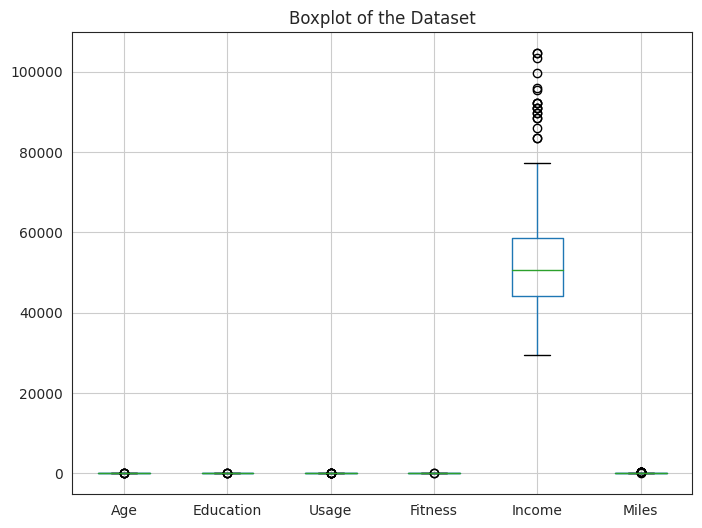

In [85]:
plt.figure(figsize=(8, 6))
df.boxplot()
plt.title("Boxplot of the Dataset")
plt.show()

In [86]:
# Step 2: Calculating the Mean and Median
mean = df.mean()
median = df.median()
# Step 3: Checking the Difference
difference = abs(mean - median)
# Step 4: Identify Outliers
# You can define a threshold for the maximum allowable difference.
# Typically, if the difference is significantly large, it may indicate outliers.
# The choice of threshold depends on your data and problem.
threshold = 80000

outliers = df.select_dtypes(include=[np.number])[abs(df.select_dtypes(include=[np.number]) - median) > threshold * difference]

# Print summary statistics
print("Summary Statistics:")
print(df.describe())

# Print outliers
print("\nPotential Outliers:")
print(outliers)

Summary Statistics:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  

Potential Outliers:
     Age  Education  Usage  Fitness  Income  Miles
0    NaN        NaN    NaN      NaN     NaN    NaN
1    NaN        NaN    NaN  

<ipython-input-86-9354f71a22a3>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-86-9354f71a22a3>:3: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



## Visual Analysis

#### **Uni Variate Analysis**

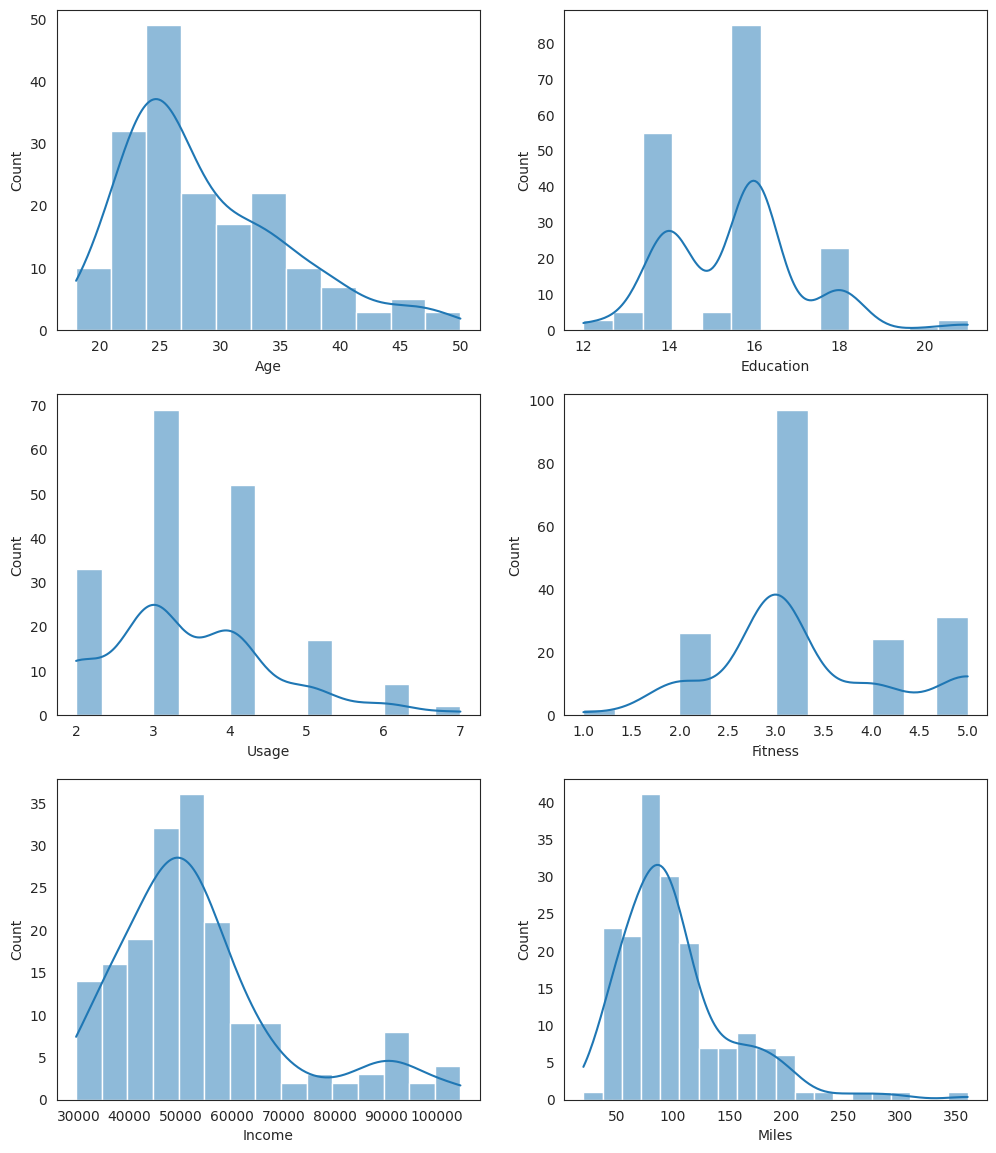

In [87]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

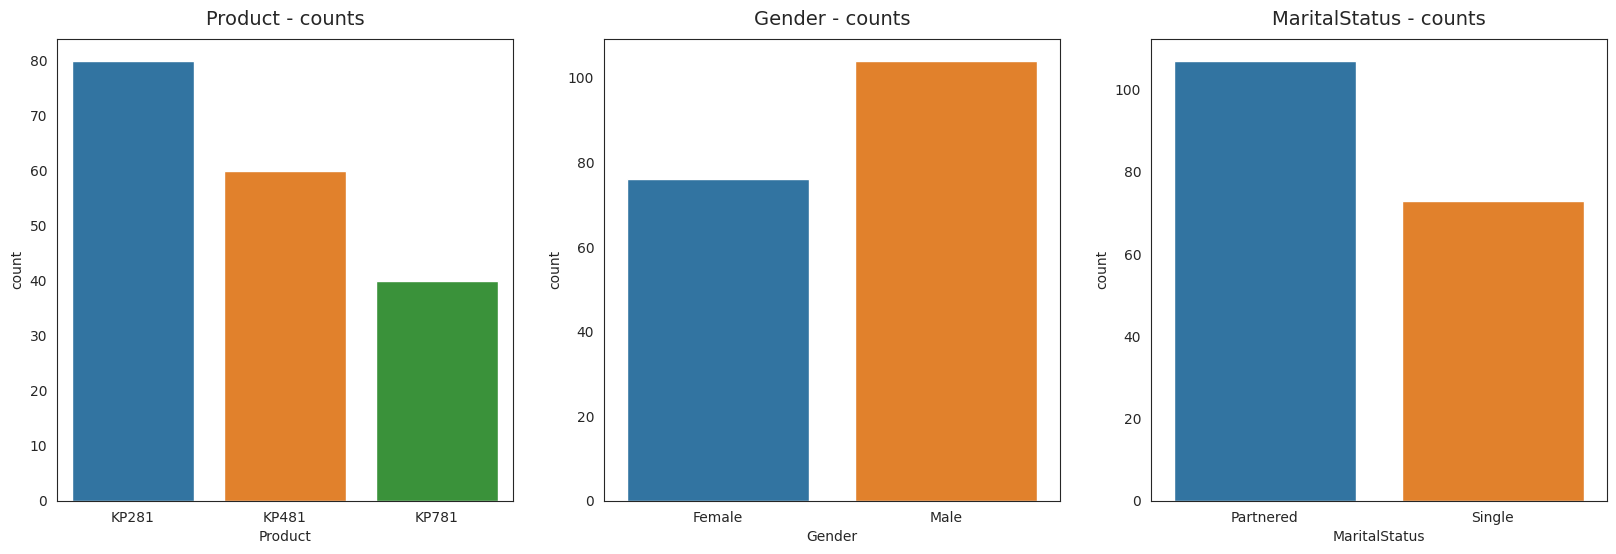

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

1. **KP281 is the Most Frequent Product:**
   - Among the available products, KP281 is the most frequently purchased product, indicating that it is the popular choice among customers.

2. **More Males in the Data:**
   - The dataset contains a higher number of male customers compared to female customers. This suggests that males are the dominant gender group in the dataset.

3. **More Partnered Persons in the Data:**
   - The data primarily consists of partnered individuals, indicating that a significant portion of the customers are in relationships or married.

#### **Bi Variate Analysis**

**Analyzing the Impact of Gender and Marital Status on Product Purchases :**


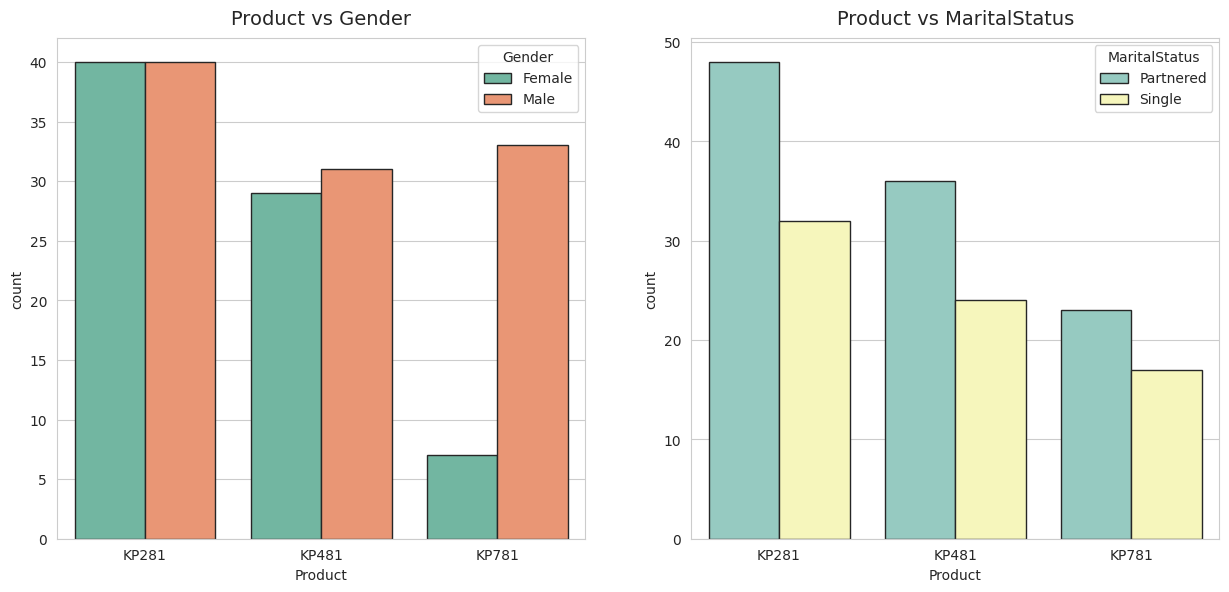

In [89]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Product vs. Gender:**
- An equal number of males and females have purchased the KP281 product, and the distribution is almost the same for the KP481 product.
- However, the majority of male customers have purchased the KP781 product, indicating a preference among male customers for this particular product.

**Product vs. Marital Status:**
- Customers who are partnered or in a relationship are more likely to purchase the product, suggesting that marital status has an influence on product choice.

## **Product Analysis**

In [90]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

Hence, there are 3 unique products in the dataset.

In [91]:
product_data  = df['Product'].value_counts().to_frame().reset_index().rename(columns={'index':'Product', 'Product':'Products sold'})

product_data['Revenue'] = pd.Series( np.array( [80*1500, 60*1750, 40*2500] ) )
product_data

,Product,Products sold,Revenue
0,KP281,80,120000
1,KP481,60,105000
2,KP781,40,100000


In [92]:
# Rename the columns
product_data = product_data.rename(columns={'Products sold': 'Product', 'count': 'Products_sold'})

In [93]:
product_data

,Product,Product,Revenue
0,KP281,80,120000
1,KP481,60,105000
2,KP781,40,100000


From the above result, it is evident that KP281 had a significant number of sales, resulting in a revenue of $1,20,000.

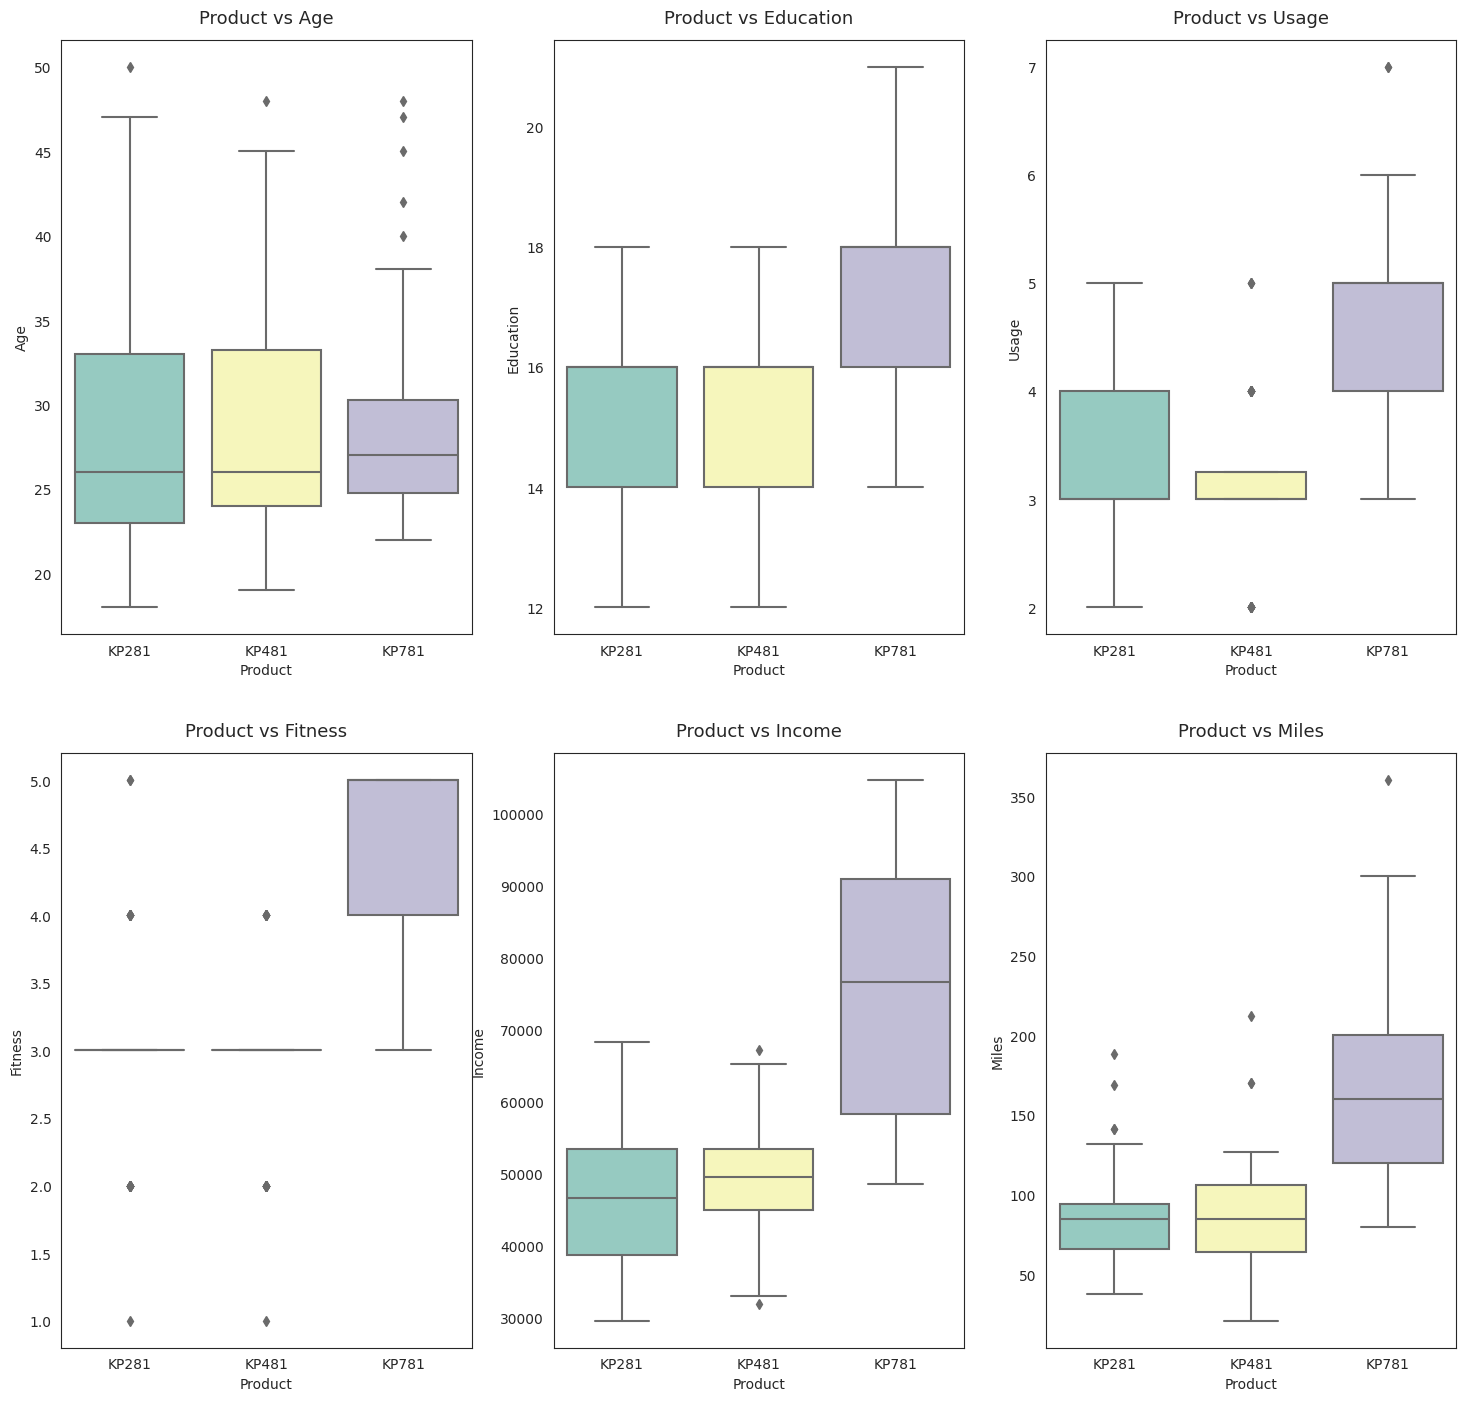

In [94]:
for col in df.columns.tolist()[1:]:
#     print(col)
    fig = px.histogram(df, x=col, color="Product", barmode='group')
    fig.update_layout(
        title=f"Distribution of the feature: {col}",
        xaxis_title=f"{col}",
        yaxis_title="Count"
    )
    fig.show()


attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

**The above plots depict the relationship between each feature and the variable "Product."**

> Customers who opt for products KP281 and KP481 share a common median age value.
Notably, customers in the age range of 25 to 30 exhibit a higher likelihood of purchasing the KP781 product.

> Customers with an educational background exceeding 16 years tend to favor the KP781 product. Conversely, those with educational levels below 16 appear equally inclined to select either KP281 or KP481.

> Those who plan to engage with the treadmill more than four times per week exhibit a strong preference for the KP781 product. In contrast, other customers are more prone to choosing between KP281 and KP481.

> Enhanced fitness levels (fitness >= 3) correspond to an increased propensity for selecting the KP781 product.

> A customer's income exceeding $60,000 demonstrates a strong association with the likelihood of purchasing the KP781 product.

> Customers who anticipate walking or running more than 120 miles per week exhibit a notably heightened likelihood of choosing the KP781 product.

## **Marginal Probability Analysis of Product Purchases**





In [95]:
# Create a crosstab to calculate marginal probabilities
cross_tab = pd.crosstab(index=df['Product'], columns='Count', normalize=True)

# Rename the columns for clarity
cross_tab.columns = ['Probability']

# Convert the probability to percentage
cross_tab['Probability'] = cross_tab['Probability'] * 100

# Display the marginal probability table
print(cross_tab)


         Probability
Product             
KP281      44.444444
KP481      33.333333
KP781      22.222222


Product KP281 leads with the highest revenue probability at 44%, followed by KP481 at 33%, and KP781 at 22%.

## **Exploratory Data Analysis: Correlation Insights for Product-Related Factors**

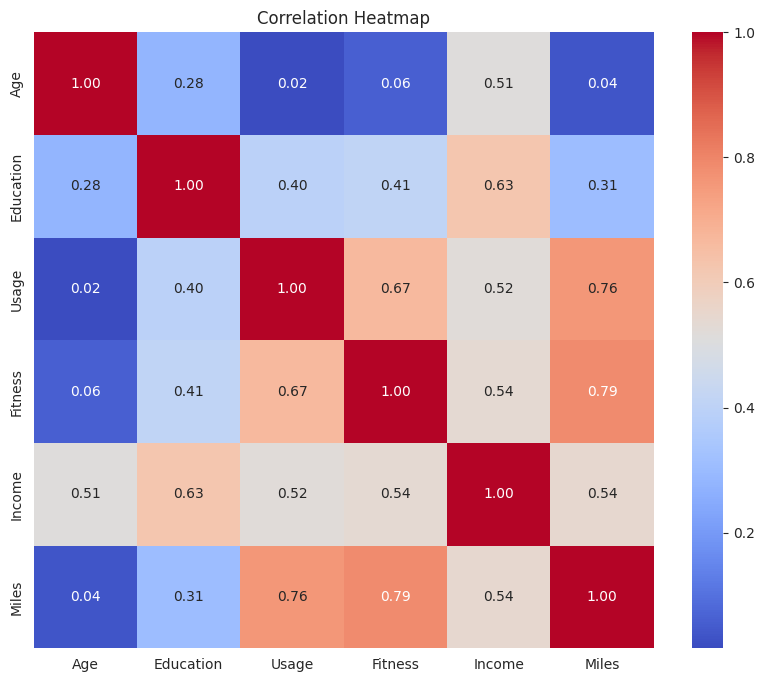

In [96]:
attributes = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

# Calculate the correlation matrix
correlation_matrix = attributes.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781).
There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

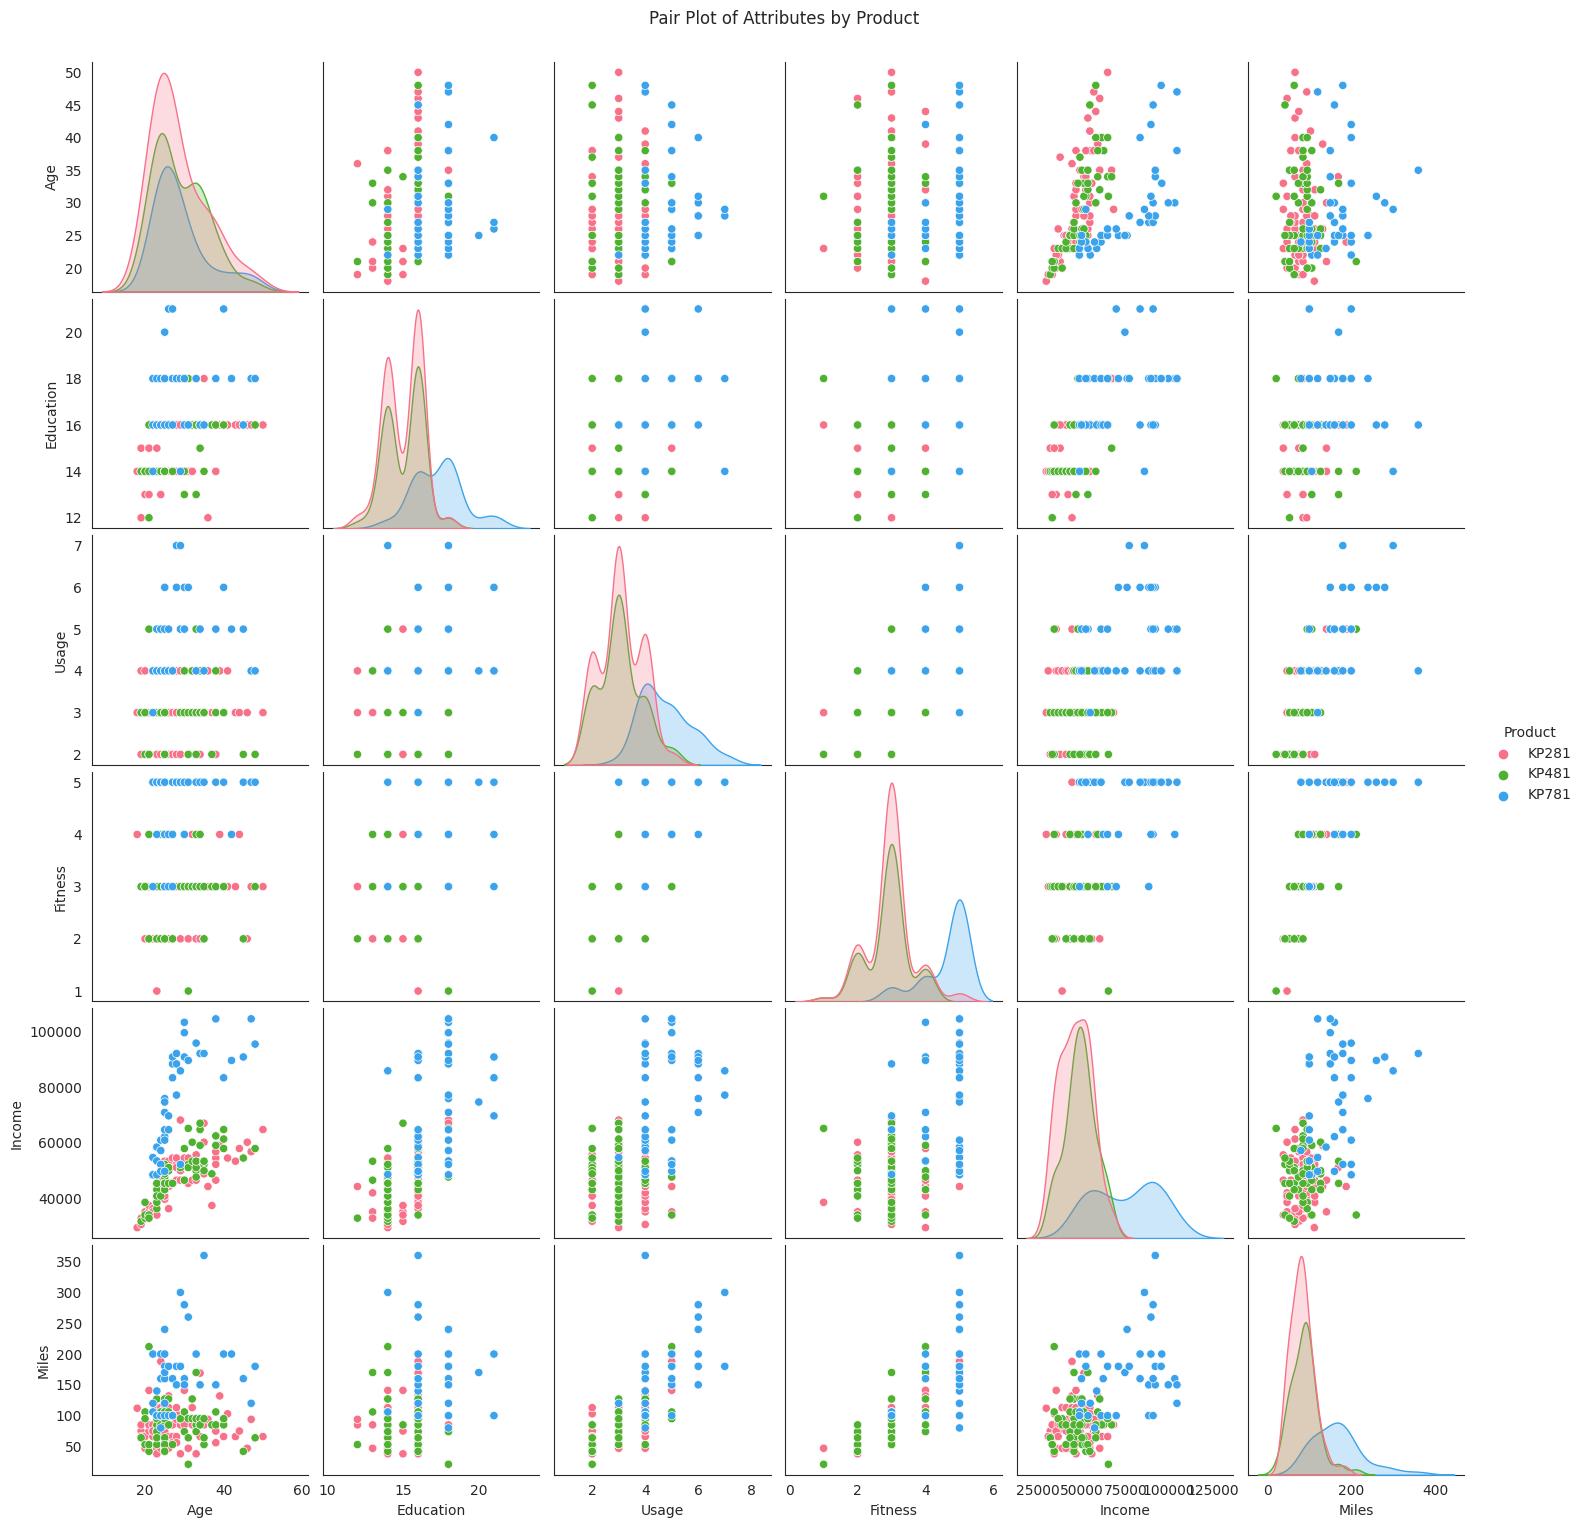

In [97]:
# Pair Plot
sns.pairplot(df, vars=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], hue='Product', palette='husl')
plt.suptitle('Pair Plot of Attributes by Product', y=1.02)
plt.show()


**Probability of a male customer to buy KP781 treadmill can be determined by :** <br>

*Number of male customers who purchased KP781/Total no.of male customer*






​




In [98]:
total_male_customers = len(df[df['Gender'] == 'Male'])
kp781_male_customers = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')])

probability_male_kp781 = kp781_male_customers / total_male_customers

print(f"Probability of a male customer buying KP781: {probability_male_kp781:.2%}")

Probability of a male customer buying KP781: 31.73%


Thus, 31.73% of the customers who purchase the KP781 treadmill are male.


## **Customer Profiling - Categorization of users**


In [99]:
# Create an empty list to store customer profiles
customer_profiles = []

# Define your customer categorization rules
for index, row in df.iterrows():
    if row['Age'] < 30 and row['Income'] >= 53000:
        profile = 'Young & High Income'
    elif row['Age'] < 30:
        profile = 'Young'
    elif row['Age'] < 50:
        profile = 'Middle-aged'
    else:
        profile = 'Senior'
    customer_profiles.append(profile)

# Add the customer profiles to the DataFrame
df['CustomerProfile'] = customer_profiles

# Display the customer profiles
result = df[['Gender', 'CustomerProfile']]
print(result)

     Gender CustomerProfile
0      Male           Young
1      Male           Young
2    Female           Young
3      Male           Young
4      Male           Young
..      ...             ...
175    Male     Middle-aged
176    Male     Middle-aged
177    Male     Middle-aged
178    Male     Middle-aged
179    Male     Middle-aged

[180 rows x 2 columns]


## **Marginal and Conditional Probabilities**






In [100]:
import pprint

for col in df.columns.tolist()[1:]:
    print("Feature: ",col)
    print()
    print("Absolute numbers: ")
    pprint.pprint(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True))
    print()
    print("Normalized numbers: ")
    pprint.pprint(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True, normalize=True))
    print()
    print("Marginal probs by gender(normalized): ")
    pprint.pprint(pd.crosstab(index=df['Gender'],columns=df
  ['Product'],margins=True, normalize='index'))
    print()
    print("Marginal probs by product(normalized): ")
    pprint.pprint(pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True, normalize='columns'))
    print("--"*50)


Feature:  Age

Absolute numbers: 
Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180

Normalized numbers: 
Product     KP281     KP481     KP781       All
Gender                                         
Female   0.222222  0.161111  0.038889  0.422222
Male     0.222222  0.172222  0.183333  0.577778
All      0.444444  0.333333  0.222222  1.000000

Marginal probs by gender(normalized): 
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308
All      0.444444  0.333333  0.222222

Marginal probs by product(normalized): 
Product  KP281     KP481  KP781       All
Gender                                   
Female     0.5  0.483333  0.175  0.422222
Male       0.5  0.516667  0.825  0.577778
-----------------------------------------------------------------------------------------------

- The KP281 treadmill generates the highest revenue, followed by KP481 and KP781.
- The majority of customers fall within the age group of 22-33 years.
- There's a nearly even distribution of male and female product buyers, with approximately a 60-40 split.
- Most customers have completed 14, 16, or 18 years of education.
- There's a nearly even split between single and partnered product buyers, with around 60% single and 40% partnered.
- The most common treadmill usage frequency is 3-4 times a week.
- Most users rate their fitness levels as average.
- A significant portion of users earns an annual income between $35,000 and $60,000.
- The majority of users set their target miles to be walked or run between 53 and 132 miles.

## **Customer Segmentation**

In [101]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)

In [102]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerProfile,AgeGroup,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,Young,"(14, 20]",Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young,"(14, 20]",Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,"(14, 20]",Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young,"(14, 20]",Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,"(14, 20]",Teens,Lower-middle income


Two new features have been introduced based on the 'Age' attribute:

1. **AgeCategory:**
   - This feature categorizes customers into four age groups, namely, "Teens," "20s," "30s," and "Above 40s." It allows for a broader understanding of the age demographics among customers.

2. **AgeGroup:**
   - AgeGroup divides customers into four distinct age brackets, specifically, "14-20," "20-30," "30-40," and "40-60." This feature provides a more granular view of the age distribution within the dataset.

In addition, a new categorical feature has been created based on the 'Income' attribute:

3. **IncomeSlab:**
   - IncomeSlab classifies customers into four income categories, including "Low Income," "Lower-middle Income," "Upper-Middle Income," and "High Income." This feature helps segment customers based on their income levels, offering valuable insights into the economic diversity of the customer base.

These new features provide a richer and more detailed perspective on customer demographics, allowing for more precise customer segmentation and analysis.

***Analysis using Contingency Tables to Calculate Probabilities***

1. Product - Incomeslab


In [103]:
pd.crosstab(index=df['Product'], columns=[df['IncomeSlab']],margins=True)

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [104]:
# Sum of the treadmill purchased by low income customer by total no. of customers.
round(14/180,2)*100

8.0

In [105]:
# Sum of the treadmill with model KP781 purchased by high income customer by total no. of customers.
round(17/180,2)*100

9.0

In [106]:
# Percentage of customer with high-Income salary buying treadmill given that Product is KP781
# (Conditional Probability)
round(17/17,2)*100

100.0

Customers having salary more than $85,000 buys only KP781 (high-end Model)

2. Product - AgeCategory

In [107]:
pd.crosstab(index=df['Product'], columns=[df['AgeCategory']],margins=True)


AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [108]:
# Percentage of customers with Age between 20s and 30s using treadmills
prob = round((110/180),2)
pctg = round(prob*100,2)
pctg

61.0

Teen doesnot prefer to buy KP781, & 61% of customer with Age group between 20 and 30 purchase treadmills.



3. Product - Gender


In [109]:
pd.crosstab(index=df['Product'], columns=[df['Gender']],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [110]:
# Percentage of a Male customer purchasing a treadmill
prob = round((104/180),2)
pct = round(prob*100,2)
pct

58.0

In [111]:
# Percentage of a Female customer purchasing TM798 treadmill
prob = round((7/180),2)
pct = round(prob*100,2)
pct

4.0

Percentage of Female customer buying treadmill given that Product is KP281

*   P(A|B) = P(A,B)/P(B)
*   P(Female|KP281) = P(Female,KP281)/P(KP281)




In [112]:
prob = round((40/80),2)
pct = round(prob*100,2)
pct

50.0

Female customer prefer to buy TM195 & TM498
50% of female tend to purchase treadmill model TM195

## ***Conclusion***

- The best-selling treadmill model is KP281, accounting for 44.0% of all treadmill sales. This indicates a strong preference among customers for this particular model.

- The majority of treadmill customers have an annual income falling within the USD 45,000 - USD 80,000 bracket, with 83% of treadmills being purchased by individuals in this income range.

- Only 8% of customers with incomes below USD 35,000 buy treadmills, suggesting that treadmill purchases are less common among individuals in lower income brackets.

- A significant portion, 88%, of treadmill buyers are between the ages of 20 to 40, indicating that this age group represents the majority of customers for this product.

- There is a strong correlation between miles covered and both fitness level and treadmill usage. This suggests that customers with higher fitness levels tend to use treadmills more frequently.

- TM781 is a model purchased exclusively by customers with more than 20 years of education and an annual income exceeding USD 85,000. This high-income and highly educated customer segment shows a specific preference for this model.

## ***Recommendations***



> KP281 and KP481 treadmills have proven to be popular choices among customers with income levels around USD 45,000 and USD 60,000. These models can be positioned as affordable options within Aerofit's product lineup.

> On the other hand, KP781 should be marketed as a premium model. Targeting high-income customer segments and those with over 20 years of education could lead to increased sales and profitability. Its advanced features and capabilities make it an attractive choice for customers seeking a top-tier treadmill experience.

> In order to expand its customer base, Aerofit can consider conducting market research to explore the potential of attracting customers with income levels under USD 35,000. Understanding the needs and preferences of this customer segment may open up new market opportunities. Added features and specialized discounts could help boost sales

> Given that KP781 is a premium model, it is ideally suited for customers who are enthusiastic about fitness and lead an active lifestyle, often reflected in a high average weekly mileage. Aerofit can emphasize the performance and advanced features of this treadmill to target sporty individuals who seek top-quality fitness equipment. Campaigns to promote KP781 product for female customers especially.
